In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive/ZTM/NotebookLM


# AI Product Manager Agent with CrewAI

This is a Crew about a Product Manger. The AI Agents would tell us what we could or should do, and also build everything around the Product Managment wich is building user stories, advertising the most important ones.

*   **AI Agent** that describes the image
*   **AI Agent** that makes improvement Suggestions (Designer)
* **AI Agent** (Product Manager) that creates user stories and prioritizes them

To process the image we will use **VisionTool()**

In [56]:
from google.colab import userdata
api_key = userdata.get('NotebookLM')

In [57]:
!pip install 'crewai[tools]'

In [58]:
!pip freeze

absl-py==1.4.0
accelerate==1.9.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.4
altair==5.5.0
annotated-types==0.7.0
anthropic==0.61.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
anywidget==0.9.18
appdirs==1.4.4
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.7.2
arviz==0.22.0
asgiref==3.9.1
astropy==7.1.0
astropy-iers-data==0.2025.7.28.0.41.50
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backoff==2.2.1
backports.tarfile==1.2.0
bcrypt==4.3.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.13.0
bigquery-magics==0.10.1
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.6.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
browserbase==1.4.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.7.14
cffi==1.17.1
charde

In [59]:
import os
os.environ['OPENAI_API_KEY'] = api_key

In [70]:
# Import Libraries
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import VisionTool
from IPython.display import display, Markdown

In [61]:
llm = LLM(
    model = 'gpt-4o',
    temperature = 0.8
)

# AI Agent for Image Description

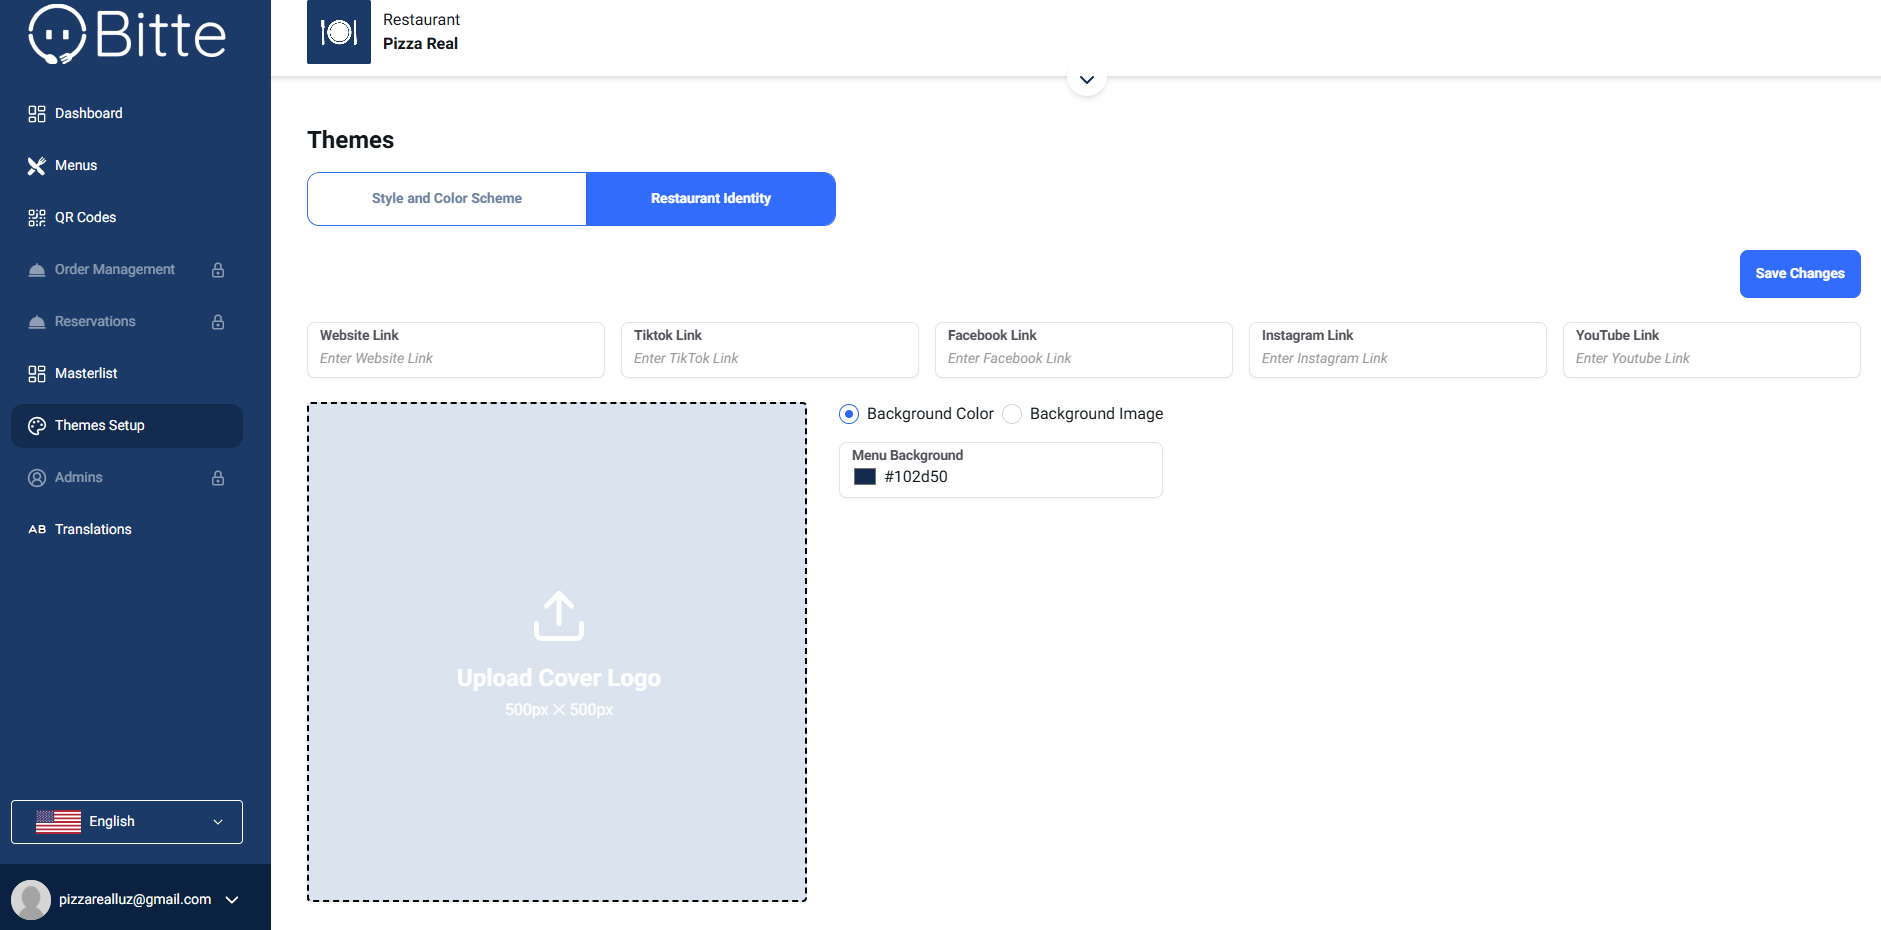

In [62]:
from PIL import Image

image_path = 'image1.png'

image = Image.open('image1.png')

image

In [63]:
vision_tool = VisionTool()

In [64]:
image_describer_agent = Agent(
    role = 'Image describer',
    goal = f'Describe the content of an image {image_path} accurately and comprehensively.',
    backstory = 'Expert Disgner working for a B2B restaurant startup',
    verbose = True,
    tools = [vision_tool],
    llm = llm
)

In [65]:
describe_image_task = Task(
    description = 'Describe the content of the image.',
    expected_output = 'A detailed description of the iamge.',
    agent = image_describer_agent
)

# Second Agent and Task

In [66]:
designer_agent = Agent(
    role = 'Designer',
    goal = f'Suggest improvements to the described scene {image_path} based on the image description',
    backstory = 'Expert designer working for a B2B Restaurant Start Up',
    verbose = True,
    llm = llm,
    tools = [vision_tool]
)

In [67]:
suggest_improvements_task = Task(
    description = 'Suggest three improvements to the scene depicted in the image.',
    expected_output = 'A list of three concise suggestions for enhancing the scene.',
    agent = designer_agent,
    context = [describe_image_task]
)

# Third Agent and Task

In [79]:
product_manager_agent = Agent(
    role = 'Product Manager',
    goal = f'Create user stories and prioritise them based on the image {image_path} description and suggested improvements.',
    backstory = 'Expert Product manager working for B2B Restaurant Startup',
    verbose = True,
    llm = llm,
    tools = [vision_tool]
)

In [80]:
create_user_stories_task = Task(
    description = 'Create three user stories and rank them in order of priority based on the provided image description and suggested improvements.',
    expected_output = 'A numbered list of three user stories with a clear priority ranking',
    agent = product_manager_agent,
    context = [describe_image_task, suggest_improvements_task]
)

# Build the team of agents

In [81]:
# Assemble the crew
ai_team = Crew(
    agents = [image_describer_agent, designer_agent, product_manager_agent],
    tasks = [describe_image_task, suggest_improvements_task, create_user_stories_task],
    process = Process.sequential
)

In [82]:
# Execute the crew
result = ai_team.kickoff()

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Image describer                                                                                         │
│                                                                                                                 │
│  Task: Describe the content of the image.                                                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Image describer                                                                                         │
│                                                                                                                 │
│  Thought: Thought: To accurately describe the content of image1.png, I should use the Vision Tool to analyze    │
│  the image.                                                                                                     │
│                                                                                                                 │
│  Using Tool: Vision Tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"image_path_url\": \"image1.png\"}"                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  The image appears to be a screenshot of a restaurant management interface, specifically for a service called   │
│  "Bitte." It features sections for setting up themes related to a restaurant named "Pizza Real." The interface  │
│  includes options for entering links to social media platforms (like TikTok, Facebook, Instagram, and YouTube)  │
│  and an area for uploading a cover logo. There's also a section to choose a background color or image, with a   │
│  specific menu background color shown in hex code (#102d50). The layout includes a navigation panel on the      │
│  left for various functionalities such as order management and reservations.                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Image describer                                                                                         │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  The image is a screenshot of a restaurant management interface for a service called "Bitte," which is          │
│  tailored for managing a restaurant named "Pizza Real." The interface includes several sections designed for    │
│  customization and branding. There is a section dedicated to setting up social media links, with fields for     │
│  entering URLs for TikTok, Facebook, Instagram, and YouTube. Additionally, there's an area for uploading a      │
│  cover logo, which is a key part of the branding process.                                                       │
│                                                                                                                 │
│  The interface also allows for color customization, providing options to select a background color or use an    │
│  image. A specific color is displayed with a hex code (#102d50), likely representing the menu background color  │
│  for the restaurant theme. This customization feature helps in maintaining a cohesive visual identity for the   │
│  restaurant.                                                                                                    │
│                                                                                                                 │
│  On the left side of the interface, there is a navigation panel that offers various functionalities essential   │
│  for restaurant operations. These include options for managing orders and handling reservations, suggesting a   │
│  comprehensive tool intended to streamline restaurant management tasks. The overall layout and options          │
│  indicate a focus on both aesthetic customization and functional management capabilities.                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Designer                                                                                                │
│                                                                                                                 │
│  Task: Suggest three improvements to the scene depicted in the image.                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Designer                                                                                                │
│                                                                                                                 │
│  Thought: Thought: To suggest improvements to the scene depicted in the image, I need to understand the         │
│  current layout and design of the restaurant management interface. I will use the Vision Tool to get a          │
│  detailed description of the image.                                                                             │
│                                                                                                                 │
│  Using Tool: Vision Tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"image_path_url\": \"image1.png\"}"                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  The image appears to be a screenshot of a restaurant management interface, specifically for a service called   │
│  "Bitte." It features sections for setting up themes related to a restaurant named "Pizza Real." The interface  │
│  includes options for entering links to social media platforms (like TikTok, Facebook, Instagram, and YouTube)  │
│  and an area for uploading a cover logo. There's also a section to choose a background color or image, with a   │
│  specific menu background color shown in hex code (#102d50). The layout includes a navigation panel on the      │
│  left for various functionalities such as order management and reservations.                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Designer                                                                                                │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  1. Enhance the User Interface with Visual Cues: To improve usability, consider adding visual indicators or     │
│  tooltips next to the social media link fields and color customization sections. This will guide users in       │
│  understanding the purpose and ideal content for each field, enhancing the user experience.                     │
│                                                                                                                 │
│  2. Integrate a Real-Time Preview Feature: Implement a real-time preview section within the interface where     │
│  users can instantly see changes made to colors, logos, and other branding elements. This could reduce errors   │
│  and improve satisfaction by allowing users to visualize the impact of their design choices.                    │
│                                                                                                                 │
│  3. Optimize Navigation Panel for Better Accessibility: Review the navigation panel's design to ensure it is    │
│  intuitive and accessible. Consider grouping similar functionalities for a more organized layout and            │
│  incorporating search functionality or shortcuts for frequently accessed features, streamlining the management  │
│  process.                                                                                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Product Manager                                                                                         │
│                                                                                                                 │
│  Task: Create three user stories and rank them in order of priority based on the provided image description     │
│  and suggested improvements.                                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Product Manager                                                                                         │
│                                                                                                                 │
│  Thought: Thought: I need to understand the details and context of the image more clearly to create accurate    │
│  and effective user stories.                                                                                    │
│                                                                                                                 │
│  Using Tool: Vision Tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"image_path_url\": \"image1.png\"}"                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  The image appears to be a screenshot of a restaurant management interface, specifically for a service called   │
│  "Bitte." It features sections for setting up themes related to a restaurant named "Pizza Real." The interface  │
│  includes options for entering links to social media platforms (like TikTok, Facebook, Instagram, and YouTube)  │
│  and an area for uploading a cover logo. There's also a section to choose a background color or image, with a   │
│  specific menu background color shown in hex code (#102d50). The layout includes a navigation panel on the      │
│  left for various functionalities such as order management and reservations.                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Product Manager                                                                                         │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  1. **User Story 1: Integrate Real-Time Preview Feature**                                                       │
│     - As a restaurant manager using the "Bitte" interface, I want to have a real-time preview section in the    │
│  customization area, so that I can instantly see the impact of color, logo, and branding changes, ensuring      │
│  that my design choices align with my restaurant's branding and reducing the likelihood of errors.              │
│     - Priority: High                                                                                            │
│                                                                                                                 │
│  2. **User Story 2: Enhance User Interface with Visual Cues**                                                   │
│     - As a restaurant manager, I need visual indicators or tooltips next to the social media link fields and    │
│  color customization sections, so that I can better understand what type of content is expected, enhancing my   │
│  overall user experience and efficiency in customizing the interface.                                           │
│     - Priority: Medium                                                                                          │
│                                                                                                                 │
│  3. **User Story 3: Optimize Navigation Panel for Better Accessibility**                                        │
│     - As a user of the "Bitte" restaurant management system, I want the navigation panel to be more intuitive   │
│  and accessible, possibly by grouping similar functionalities and including a search feature, so that I can     │
│  streamline my management tasks and easily find frequently used features.                                       │
│     - Priority: Low                                                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [83]:
print(result)

1. **User Story 1: Integrate Real-Time Preview Feature**
   - As a restaurant manager using the "Bitte" interface, I want to have a real-time preview section in the customization area, so that I can instantly see the impact of color, logo, and branding changes, ensuring that my design choices align with my restaurant's branding and reducing the likelihood of errors.
   - Priority: High

2. **User Story 2: Enhance User Interface with Visual Cues**
   - As a restaurant manager, I need visual indicators or tooltips next to the social media link fields and color customization sections, so that I can better understand what type of content is expected, enhancing my overall user experience and efficiency in customizing the interface.
   - Priority: Medium

3. **User Story 3: Optimize Navigation Panel for Better Accessibility**
   - As a user of the "Bitte" restaurant management system, I want the navigation panel to be more intuitive and accessible, possibly by grouping similar functionalitie

In [84]:
# Image describer Agent Output
print(f'### Image Describer Agent')
print(f'**Description:**{describe_image_task.output.description}')
print(f"**Output:**\n´´´\n{describe_image_task.output.raw}")

### Image Describer Agent
**Description:**Describe the content of the image.
**Output:**
´´´
The image is a screenshot of a restaurant management interface for a service called "Bitte," which is tailored for managing a restaurant named "Pizza Real." The interface includes several sections designed for customization and branding. There is a section dedicated to setting up social media links, with fields for entering URLs for TikTok, Facebook, Instagram, and YouTube. Additionally, there's an area for uploading a cover logo, which is a key part of the branding process.

The interface also allows for color customization, providing options to select a background color or use an image. A specific color is displayed with a hex code (#102d50), likely representing the menu background color for the restaurant theme. This customization feature helps in maintaining a cohesive visual identity for the restaurant.

On the left side of the interface, there is a navigation panel that offers various fun

In [85]:
for idx, task_output in enumerate(result.tasks_output):
  display(Markdown(f"Agent {idx + 1}: {task_output.agent}\n{task_output.raw}"))

Agent 1: Image describer
The image is a screenshot of a restaurant management interface for a service called "Bitte," which is tailored for managing a restaurant named "Pizza Real." The interface includes several sections designed for customization and branding. There is a section dedicated to setting up social media links, with fields for entering URLs for TikTok, Facebook, Instagram, and YouTube. Additionally, there's an area for uploading a cover logo, which is a key part of the branding process.

The interface also allows for color customization, providing options to select a background color or use an image. A specific color is displayed with a hex code (#102d50), likely representing the menu background color for the restaurant theme. This customization feature helps in maintaining a cohesive visual identity for the restaurant.

On the left side of the interface, there is a navigation panel that offers various functionalities essential for restaurant operations. These include options for managing orders and handling reservations, suggesting a comprehensive tool intended to streamline restaurant management tasks. The overall layout and options indicate a focus on both aesthetic customization and functional management capabilities.

Agent 2: Designer
1. Enhance the User Interface with Visual Cues: To improve usability, consider adding visual indicators or tooltips next to the social media link fields and color customization sections. This will guide users in understanding the purpose and ideal content for each field, enhancing the user experience.

2. Integrate a Real-Time Preview Feature: Implement a real-time preview section within the interface where users can instantly see changes made to colors, logos, and other branding elements. This could reduce errors and improve satisfaction by allowing users to visualize the impact of their design choices.

3. Optimize Navigation Panel for Better Accessibility: Review the navigation panel's design to ensure it is intuitive and accessible. Consider grouping similar functionalities for a more organized layout and incorporating search functionality or shortcuts for frequently accessed features, streamlining the management process.

Agent 3: Product Manager
1. **User Story 1: Integrate Real-Time Preview Feature**
   - As a restaurant manager using the "Bitte" interface, I want to have a real-time preview section in the customization area, so that I can instantly see the impact of color, logo, and branding changes, ensuring that my design choices align with my restaurant's branding and reducing the likelihood of errors.
   - Priority: High

2. **User Story 2: Enhance User Interface with Visual Cues**
   - As a restaurant manager, I need visual indicators or tooltips next to the social media link fields and color customization sections, so that I can better understand what type of content is expected, enhancing my overall user experience and efficiency in customizing the interface.
   - Priority: Medium

3. **User Story 3: Optimize Navigation Panel for Better Accessibility**
   - As a user of the "Bitte" restaurant management system, I want the navigation panel to be more intuitive and accessible, possibly by grouping similar functionalities and including a search feature, so that I can streamline my management tasks and easily find frequently used features.
   - Priority: Low